|  x   |    y   |
|------|--------|
| 0.10 | 300.00 |
| 0.20 | 340.00 |
| 0.50 | 401.00 |
| 0.70 | 470.00 |
| 0.80 | 540.00 |
| 0.90 | 602.00 |
| 1.00 | 640.00 |
| 1.10 | 680.00 |
| 1.20 | 731.00 |
| 1.80 | 880.00 |

**Экстраполяция для точки x=2.0**


In [14]:
import numpy as np

# Данные которые даны
x_data = np.array([0.10,
                   0.20,
                   0.50, 
                   0.70, 
                   0.80, 
                   0.90, 
                   1.00, 
                   1.10, 
                   1.20, 
                   1.80])
y_data = np.array([300.00, 
                   340.00, 
                   401.00, 
                   470.00, 
                   540.00, 
                   602.00,
                   640.00, 
                   680.00,
                   731.00, 
                   880.00])

x_need=2. # таргет

#Остальное, по идее, не менять!


## Решение

In [15]:
# Суммы x и y
sum_x = np.sum(x_data)
sum_y = np.sum(y_data)

# Вычисления через numpy
x_2 = np.power(x_data, 2)  # x^2
x_3 = np.power(x_data, 3)  # x^3
x_4 = np.power(x_data, 4)  # x^4
x_2y = np.power(x_data, 2) * y_data  # x^2 * y
xy = x_data * y_data  # x * y

# Вывод значений
for i in range(len(x_data)):
    print(f"x^2: {x_2[i]}, x^3: {x_3[i]}, x^4: {x_4[i]}, x^2*y: {x_2y[i]}, x*y: {xy[i]}")

x^2: 0.010000000000000002, x^3: 0.0010000000000000002, x^4: 0.00010000000000000002, x^2*y: 3.0000000000000004, x*y: 30.0
x^2: 0.04000000000000001, x^3: 0.008000000000000002, x^4: 0.0016000000000000003, x^2*y: 13.600000000000003, x*y: 68.0
x^2: 0.25, x^3: 0.125, x^4: 0.0625, x^2*y: 100.25, x*y: 200.5
x^2: 0.48999999999999994, x^3: 0.3429999999999999, x^4: 0.24009999999999995, x^2*y: 230.29999999999998, x*y: 329.0
x^2: 0.6400000000000001, x^3: 0.5120000000000001, x^4: 0.4096000000000001, x^2*y: 345.6000000000001, x*y: 432.0
x^2: 0.81, x^3: 0.7290000000000001, x^4: 0.6561, x^2*y: 487.62, x*y: 541.8000000000001
x^2: 1.0, x^3: 1.0, x^4: 1.0, x^2*y: 640.0, x*y: 640.0
x^2: 1.2100000000000002, x^3: 1.3310000000000004, x^4: 1.4641000000000004, x^2*y: 822.8000000000002, x*y: 748.0000000000001
x^2: 1.44, x^3: 1.7279999999999998, x^4: 2.0736, x^2*y: 1052.6399999999999, x*y: 877.1999999999999
x^2: 3.24, x^3: 5.832000000000001, x^4: 10.4976, x^2*y: 2851.2000000000003, x*y: 1584.0


In [16]:
import pandas as pd

# Создание DataFrame
data = {
    'x': x_data,
    'x^2': x_2,
    'x^3': x_3,
    'x^4': x_4,
    'x^2 * y': x_2y,
    'x * y': xy
}

df = pd.DataFrame(data)

# Вывод таблицы
print(df)

     x   x^2    x^3      x^4  x^2 * y   x * y
0  0.1  0.01  0.001   0.0001     3.00    30.0
1  0.2  0.04  0.008   0.0016    13.60    68.0
2  0.5  0.25  0.125   0.0625   100.25   200.5
3  0.7  0.49  0.343   0.2401   230.30   329.0
4  0.8  0.64  0.512   0.4096   345.60   432.0
5  0.9  0.81  0.729   0.6561   487.62   541.8
6  1.0  1.00  1.000   1.0000   640.00   640.0
7  1.1  1.21  1.331   1.4641   822.80   748.0
8  1.2  1.44  1.728   2.0736  1052.64   877.2
9  1.8  3.24  5.832  10.4976  2851.20  1584.0


In [17]:
sums = df.sum()
print("\nСуммы для каждого столбца:")
print(sums)


Суммы для каждого столбца:
x             8.3000
x^2           9.1300
x^3          11.6090
x^4          16.4053
x^2 * y    6547.0100
x * y      5450.5000
dtype: float64


In [18]:
import numpy as np

# Матрица коэффициентов
A = np.array([
    [10,sums["x"], sums["x^2"]],
    [sums["x"], sums["x^2"], sums["x^3"]],
    [sums["x^2"], sums["x^3"], sums["x^4"]]
])

# Правая часть уравнений
B = np.array([sum_y, sums["x^2 * y"], sums["x * y"]])

# Решение системы уравнений
X = np.linalg.solve(A, B)

# Вывод решения
print(f"a0 = {X[0]}, a1 = {X[1]}, a2 = {X[2]}")


print(f"y={X[2]}x**2 + {X[1]}x + {X[0]}")


a0 = -2337.7417095511896, a1 = 7638.766618482969, a2 = -3772.217506889019
y=-3772.217506889019x**2 + 7638.766618482969x + -2337.7417095511896


In [19]:
x_mean = np.mean(x_data)
y_mean = np.mean(y_data)

# Вычисляем коэффициент b1
b1 = np.sum((x_data - x_mean) * (y_data - y_mean)) / np.sum((x_data - x_mean) ** 2)

# Вычисляем коэффициент b0
b0 = y_mean - b1 * x_mean

print("b1 (угловой коэффициент):", b1)
print("b0 (свободный член):", b0)

b1 (угловой коэффициент): 364.0249888442659
b0 (свободный член): 256.25925925925924


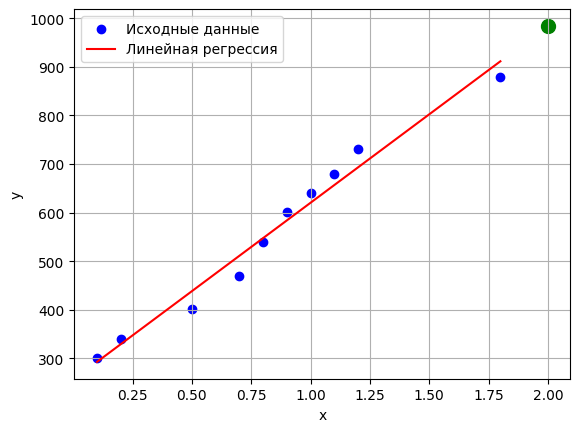

984.3092369477911


In [27]:
from matplotlib import pyplot as plt  # Прямая
x_line = np.linspace(min(x_data), max(x_data), 200)
y_line = b1 * x_line + b0

# Построение графика
plt.scatter(x_data, y_data, color='blue', label='Исходные данные')
plt.plot(x_line, y_line, color='red', label='Линейная регрессия')
plt.scatter(x_need, b1 * x_need + b0, color='green', s=100)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

ans = b1 * x_need + b0
print(ans)



## Проверка

In [30]:
from sklearn.linear_model import LinearRegression

# Модель линейной регрессии
model = LinearRegression()

# Обучаем модель, изменяя размерность только в момент вызова fit
model.fit(x_data.reshape(-1, 1), y_data)

# Значение x для экстраполяции, изменяя размерность в момент вызова predict
x_new = np.array([[x_need]])

# Предсказание значения y для таргета
y_pred = model.predict(x_new)

print(f"Предсказанное значение y для x = {x_need}: {y_pred[0]}")
if(y_pred[0] == ans):
    print("Задча решена верно!")
else:
    print("что то не получилось...")

Предсказанное значение y для x = 2.0: 984.3092369477911
Задча решена верно!
